In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA    

# Pretty display for notebooks
%matplotlib inline
from random import shuffle

In [2]:
# import numpy as np
# k=[*range(0,10)]
# print(k)
# print(np.random.shuffle(k))

# p=[]
# for i in range(3):
#     p.append(0)
# p[0]=0
# p[1]=1
# p[2]=2
# print(p)

# # for i in range(10):
# #     a = 'l_'
# #     b = str(i)
# #     c = a+b
    
# #     print(c)
# #     c= [p]
    
# #     print(c)
# c=np.zeros(10,dtype=int)    
# for i in range(10):
# #     a = 'l_'
# #     b = str(i)
# #     c = a+b
    
# #     print(c)
#     c[i]= i
    
# print(c[0:9])        
# k=c[0:9]
# print(k)
   

In [3]:
# p=np.arange(0,10)
# np.random.shuffle(p)
# print(p)
# p=np.arange(0,10,1)
# np.random.shuffle(p)
# print(p)

# dict = {0: [1, 2,3]}
# for k,v in dict.items():
#     print(k,v)   
    
# dict1={}    
# p=[0 ,2,1]    
# for k in dict.keys():
#     dict1[k]=np.array(dict[k])[p]
# print(dict)    

In [4]:
import numpy as np
'''
def report_index(index,pas,data1,e):
        row=data1.shape[0]
        column=data1.shape[1]
        a1=  data1[0][0:column]
        matric=np.zeros((row,column),dtype=int)
        final_indices=np.zeros(row,dtype=int)
        list_var=[]
        rank=np.zeros(column,dtype=int)
        counter=np.zeros(row,dtype=int)
        
        for i in range(row):
            if data1[i][index]==1:
                list_var.append(i)
                
        
        for j in list_var:
            cv=e[index][1]
            rank=np.zeros(column,dtype=int)
            for i in range(column):
                 if data1[j][i]==1:
                    if rank[i]==0 and e[i][1]<=cv:
                        if e[i][1]<cv:
                            counter[j]=counter[j]+1 
                            rank[i]=1
                        
                        elif e[i][1]==cv and i<=index:
                            counter[j]=counter[j]+1 
                            rank[i]=1
                            
'''
#         j=pas
#         cv=e[index][1]
#         rank=np.zeros(column,dtype=int)
#         for i in range(column):
#              if data1[j][i]==1:
#                 if e[i][1]<cv:
#                         counter[j]=counter[j]+1 
                            
                                     
#         print(counter)                
        return  counter[pas]
# data1=np.array([[0,1,0,0,1,0,1],[1,0,1,1,0,1,0],[1,1,1,0,0,0,1],[0,0,0,1,1,1,0]])
# e=np.array([[0.8,0.2],[.1,0.9],[.1,.9],[.6,.4],[.6,.4],[0.6,0.4],[.7,.3]])
# report_index(3,2,data1,e)
                        

IndentationError: unexpected indent (<ipython-input-4-d66dafc30695>, line 43)

In [ ]:
#NG
'''
import time
import pulp as p 
def min_max_lp_all_ng4(data1,beta,eps,e):
    import pulp as p 
    import math
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
    ################ sorted result
    
    
    ################
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1 
        if count>max_size:
            max_size=count
        sizes[i]=count
  
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  
#     for i in range(m):
#         k=n+i+1
#         var1=str(k)     
#         alpha=(((sizes[i])*(sizes[i]+1))/2)
#         X[i]=p.LpVariable(var1,lowBound=(((beta*sizes[i])*(beta*sizes[i]+1))/2),upBound=alpha,cat='Continuous')
    
        
#     X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)
  

    #########objective function#####################
    
#     Lp_prob += 2*X[n+1]+10*X[n+2]+9*X[n+3]+3*X[n+4]
    Lp_prob+= p.lpSum([p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1) for j in range(n)]) for i in range(m)])
  
    

    ##############constraint#################
    for i in range(2*m):
        if i<m:

            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= beta*sizes[i]
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= (beta+eps)*sizes[i]
           # Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1) for j in range(n)]) <= X[n+i+1]

#              Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1)/1000 for j in range(n)]) >= X[n+i+1]
    
            
#         else:        
#             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])   /((sizes[i])*(sizes[i]+1)/2)
            #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
    
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l1.index(i))) for i in l1]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[0]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l2.index(i))) for i in l2]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[1]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l3.index(i))) for i in l3]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[2]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l4.index(i))) for i in l4]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[3]))))
    
    #n is the number of elements in sensitive attribute 
                 
#     Lp_prob += X[n] <= 42000
        
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2
'''    


In [29]:
# bilal - am_ind asian black other white female male(actual precision sequence)
# 6         5          4          2                1              0                  3

# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo','r_other
           
# beta=[6         5          4          2                1              0                  3]

# beta=[beta[6], beta[5],beta[4],beta[2],beta[1],beta[0],beta[3]]


#bilal -female male  am_ind asian  black other white (actual acceptance rate sequence)
#          0      1     2       3     4      5    6   
# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo', 'r_other
           
# beta=[1       0        6          4            3                   2                    5]


#NG
import time
import pulp as p 
def min_sum_lpca_g(data1,beta,eps,e,alpha):
    import pulp as p 
    import math
    #for bilal
    #beta=[beta1[1], beta1[0],beta1[6],beta1[4],beta1[3],beta1[2],beta1[5]]
    #print(beta)
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
   
  
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]
    h6=[]
    h7=[]
    key1=[]
    key2=[]
    key3=[]
    key4=[]
    key5=[]
    key6=[]
    key7=[]
    h8=[]
    h9=[]
    h10=[]
    h11=[]
    h12=[]
    h13=[]
    h14=[]
    key8=[]
    key9=[]
    key10=[]
    key11=[]
    key12=[]
    key13=[]
    key14=[]
    cost=np.zeros(n,dtype=int)
    data2=np.zeros((m,n),dtype=int)
    for i in range(n):
        if data1[0][i]==1:            

            h1.append(e[i][1])
            key1.append(i)
            

        if data1[1][i]==1:
            h2.append(e[i][1])
            key2.append(i)
            
            
        if data1[2][i]==1:
            h3.append(e[i][1])
            key3.append(i)
            
        if data1[3][i]==1:
            h4.append(e[i][1])
            key4.append(i)
        if data1[4][i]==1:
            h5.append(e[i][1])
            key5.append(i)
        if data1[5][i]==1:
            h6.append(e[i][1])
            key6.append(i)
        if data1[6][i]==1:
            h7.append(e[i][1])
            key7.append(i)
        if data1[7][i]==1:            
            h8.append(e[i][1])
            key8.append(i)
        if data1[8][i]==1:
            h9.append(e[i][1])
            key9.append(i)
            
            
        if data1[9][i]==1:
            h10.append(e[i][1])
            key10.append(i)
            
        if data1[10][i]==1:
            h11.append(e[i][1])
            key11.append(i)
        if data1[11][i]==1:
            h12.append(e[i][1])
            key12.append(i)
        if data1[12][i]==1:
            h13.append(e[i][1])
            key13.append(i)
        
#print(hc)
#     print(key1)
    
    for i in range(1,len(h1)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h1[j-1]<h1[j]:
                index=j
                var=h1[j]
                h1[j]=h1[j-1]
                h1[j-1]=var

                var2=key1[j]
                key1[j]=key1[j-1]
                key1[j-1]=var2
            else:
                break
    

    for i in range(1,len(h2)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h2[j-1]<h2[j]:
                index=j
                var=h2[j]
                h2[j]=h2[j-1]
                h2[j-1]=var

                var2=key2[j]
                key2[j]=key2[j-1]
                key2[j-1]=var2
            else:
                break
    for i in range(1,len(h3)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h3[j]:
                index=j
                var=h3[j]
                h3[j]=h3[j-1]
                h3[j-1]=var

                var2=key3[j]
                key3[j]=key3[j-1]
                key3[j-1]=var2
            else:
                break
    for i in range(1,len(h4)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h4[j-1]<h4[j]:
                index=j
                var=h4[j]
                h4[j]=h4[j-1]
                h4[j-1]=var

                var2=key4[j]
                key4[j]=key4[j-1]
                key4[j-1]=var2
            else:
                break
    for i in range(1,len(h5)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h5[j-1]<h5[j]:
                index=j
                var=h5[j]
                h5[j]=h5[j-1]
                h5[j-1]=var

                var2=key5[j]
                key5[j]=key5[j-1]
                key5[j-1]=var2
            else:
                break
                
                
                
    for i in range(1,len(h6)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h6[j-1]<h6[j]:
                index=j
                var=h6[j]
                h6[j]=h6[j-1]
                h6[j-1]=var

                var2=key6[j]
                key6[j]=key6[j-1]
                key6[j-1]=var2
            else:
                break        
                

    for i in range(1,len(h7)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h7[j-1]<h7[j]:
                index=j
                var=h7[j]
                h7[j]=h7[j-1]
                h7[j-1]=var

                var2=key7[j]
                key7[j]=key7[j-1]
                key7[j-1]=var2
            else:
                break 
    ############################################            
    for i in range(1,len(h8)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h8[j-1]<h8[j]:
                index=j
                var=h8[j]
                h8[j]=h8[j-1]
                h8[j-1]=var

                var2=key8[j]
                key8[j]=key8[j-1]
                key8[j-1]=var2
            else:
                break
    

    for i in range(1,len(h9)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h9[j-1]<h9[j]:
                index=j
                var=h9[j]
                h9[j]=h9[j-1]
                h9[j-1]=var

                var2=key9[j]
                key9[j]=key9[j-1]
                key9[j-1]=var2
            else:
                break
    for i in range(1,len(h10)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h10[j-1]<h10[j]:
                index=j
                var=h10[j]
                h10[j]=h10[j-1]
                h10[j-1]=var

                var2=key10[j]
                key10[j]=key10[j-1]
                key10[j-1]=var2
            else:
                break
    for i in range(1,len(h11)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h11[j-1]<h11[j]:
                index=j
                var=h11[j]
                h11[j]=h11[j-1]
                h11[j-1]=var

                var2=key11[j]
                key11[j]=key11[j-1]
                key11[j-1]=var2
            else:
                break
    for i in range(1,len(h12)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h12[j-1]<h12[j]:
                index=j
                var=h12[j]
                h12[j]=h12[j-1]
                h12[j-1]=var

                var2=key12[j]
                key12[j]=key12[j-1]
                key12[j-1]=var2
            else:
                break
                
                
                
    for i in range(1,len(h13)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h13[j-1]<h13[j]:
                index=j
                var=h13[j]
                h13[j]=h13[j-1]
                h13[j-1]=var

                var2=key13[j]
                key13[j]=key13[j-1]
                key13[j-1]=var2
            else:
                break        
                

    
    '''            
    
    for j in range(len(key1)):    
        if h1[j]==h1[j-1] and j>=1:
            data2[0][key1[j]]=data2[0][key1[j-1]]
        else:    
            data2[0][key1[j]]=j+1
    for j in range(len(key2)):
        if h2[j]==h2[j-1] and j>=1:
            data2[1][key2[j]]=data2[0][key2[j-1]]
        else:    
            data2[1][key2[j]]=j+1
    for j in range(len(key3)):
        if h3[j]==h3[j-1] and j>=1:
            data2[2][key3[j]]=data2[2][key3[j-1]]
        else:    
            data2[2][key3[j]]=j+1
    for j in range(len(key4)):
        if h4[j]==h4[j-1] and j>=1:
            data2[3][key4[j]]=data2[3][key4[j-1]]
        else:    
            data2[3][key4[j]]=j+1
    for j in range(len(key5)):
        if h5[j]==h5[j-1] and j>=1:
            data2[4][key5[j]]=data2[4][key5[j-1]]
        else:    
            data2[4][key5[j]]=j+1
    for j in range(len(key6)):
        if h6[j]==h6[j-1] and j>=1:
            data2[5][key6[j]]=data2[5][key6[j-1]]
        else:    
            data2[5][key6[j]]=j+1
    for j in range(len(key7)):
        if h7[j]==h7[j-1] and j>=1:
            data2[6][key7[j]]=data2[6][key7[j-1]]
        else:    
            data2[6][key7[j]]=j+1 
    
  ###############################1#################################  
    #2nd approach
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha[1]
    for j in range(len(key3)):
        if data1[2][key3[j]]==1 and data1[0][key3[j]]==1: 
            data2[2][key3[j]]=(j+1)*(len(key1)/len(key3))*alpha[2]
        else:
            data2[2][key3[j]]=(j+1)*(len(key2)/len(key3))*alpha[2]                  
        
    for j in range(len(key4)):
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*(len(key1)/len(key4))*alpha[3]
        else :                     
            data2[3][key4[j]]=(j+1)*(len(key2)/len(key4))*alpha[3]
                             
    for j in range(len(key5)):
        if data1[4][key5[j]]==1 and data1[0][key5[j]]==1:                  
            data2[4][key5[j]]=(j+1)*(len(key1)/len(key5))*alpha[4]
        else:      
            data2[4][key5[j]]=(j+1)*(len(key2)/len(key5))*alpha[4]
    for j in range(len(key6)):
        if data1[5][key6[j]]==1 and data1[0][key6[j]]==1:                    
            data2[5][key6[j]]=(j+1)*(len(key1)/len(key6))*alpha[5]
        else:                    
             data2[5][key6[j]]=(j+1)*(len(key2)/len(key6))*alpha[5]               
    for j in range(len(key7)):
        if data1[6][key7[j]]==1 and data1[0][key7[j]]==1:
            data2[6][key7[j]]=(j+1)*(len(key1)/len(key7))*alpha[6]
        else:
             data2[6][key7[j]]=(j+1)*(len(key2)/len(key7))*alpha[6]
    '''
    '''
    
    #1st approach
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha[1]
    for j in range(len(key3)):
        data2[2][key3[j]]=(j+1)*alpha[2]              
        
    for j in range(len(key4)):
        data2[3][key4[j]]=(j+1)*alpha[3]
        
                             
    for j in range(len(key5)):               
        data2[4][key5[j]]=(j+1)*alpha[4]
       
    for j in range(len(key6)):
        data2[5][key6[j]]=(j+1)*alpha[5]
                    
    for j in range(len(key7)):
        data2[6][key7[j]]=(j+1)*alpha[6]
    '''   
    '''
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*((beta[0]*len(key1))/(beta[1]*len(key2)))*alpha[1]
    for j in range(len(key3)):
        data2[2][key3[j]]=(j+1)*((beta[2]*len(key3))/(beta[2]*len(key3)))*alpha[2]
                         
        
    for j in range(len(key4)):           
        #data2[3][key4[j]]=(j+1)*((beta[2]*len(key3))/(beta[3]*len(key4)))*alpha[3]
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*((beta[2]*len(key3))/(beta[3]*len(key4)))*alpha[3]
        else :                     
            data2[3][key4[j]]=(j+1)*((beta[2]*len(key3))/(beta[3]*len(key4)))*alpha[3]
                             
    for j in range(len(key5)):
        data2[4][key5[j]]=(j+1)*((beta[2]*len(key3))/(beta[4]*len(key5)))*alpha[4]      
    for j in range(len(key6)):                 
        data2[5][key6[j]]=(j+1)*((beta[2]*len(key3))/(beta[5]*len(key6)))*alpha[5]  
    for j in range(len(key7)):                 
        data2[6][key7[j]]=(j+1)*((beta[2]*len(key3))/(beta[6]*len(key7)))*alpha[6] 
    '''
    #######################################################################    
    
    ####################################################################### 
   
    for j in range(len(key1)):    
        data2[0][key1[j]]=(j+1)
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)
    
    for j in range(len(key3)):
        data2[2][key3[j]]=(j+1)
                         
        
    for j in range(len(key4)):           
        data2[3][key4[j]]=(j+1)
                             
    for j in range(len(key5)):
        data2[4][key5[j]]=(j+1)
       
           
    for j in range(len(key6)):                 
        data2[5][key6[j]]=(j+1)
    
    for j in range(len(key7)):                 
        data2[6][key7[j]]=(j+1)  
       
    for j in range(len(key8)):    
        data2[7][key8[j]]=(j+1)
    for j in range(len(key9)):
        data2[8][key9[j]]=(j+1)
    
    for j in range(len(key10)):
        data2[9][key10[j]]=(j+1)
                         
        
    for j in range(len(key11)):           
        data2[10][key11[j]]=(j+1)
                             
    for j in range(len(key12)):
        data2[11][key12[j]]=(j+1)
       
           
    for j in range(len(key13)):                 
        data2[12][key13[j]]=(j+1)
    
         
        
        
    for j in range(n):
        summ=0
        for i in range(m):
       
            summ=summ+data2[i][j] 
        cost[j]=summ
        
        
    ################
    
    
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1 
        if count>max_size:
            max_size=count
        sizes[i]=count
    print(sizes)    
    #############################33
    
    
    
    
    ###############################
        
        
        
  
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  
#     for i in range(m):
#         k=n+i+1
#         var1=str(k)     
#         alpha=(((sizes[i])*(sizes[i]+1))/2)
#         X[i]=p.LpVariable(var1,lowBound=(((beta*sizes[i])*(beta*sizes[i]+1))/2),upBound=alpha,cat='Continuous')
    
        
#     X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)
  

    #########objective function#####################
    
#     Lp_prob += 2*X[n+1]+10*X[n+2]+9*X[n+3]+3*X[n+4]
    from time import process_time
  

    t1_start = process_time() 
    
    Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)]) 
    #Lp_prob+=1  
    

    ##############constraint#################
    for i in range(2*m):
        if i<m:

            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= math.floor(beta[i]*sizes[i])
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= math.ceil((beta[i]+eps)*sizes[i])
           # Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1) for j in range(n)]) <= X[n+i+1]
                    
#Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1)/1000 for j in range(n)]) >= X[n+i+1]
    
            
#         else:        
#             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])   /((sizes[i])*(sizes[i]+1)/2)
            #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
    
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l1.index(i))) for i in l1]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[0]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l2.index(i))) for i in l2]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[1]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l3.index(i))) for i in l3]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[2]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l4.index(i))) for i in l4]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[3]))))
    
    #n is the number of elements in sensitive attribute 
                 
#     Lp_prob += X[n] <= 42000
    #Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)])>=100
        
    #####################################
    
    

    
    t1_stop = process_time()

    print("Elapsed time:", t1_stop, t1_start) 

    print("Elapsed time during the whole program in seconds:",
                                         t1_stop-t1_start) 
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [ ]:
import numpy as np

def report_index(index,pas,data1,e):
        row=data1.shape[0]
        column=data1.shape[1]
        a1=  data1[0][0:column]
        matric=np.zeros((row,column),dtype=int)
        final_indices=np.zeros(row,dtype=int)
        list_var=[]
        rank=np.zeros(column,dtype=int)
        counter=np.zeros(row,dtype=int)
        
        for i in range(row):
            if data1[i][index]==1:
                list_var.append(i)
                
        
        for j in list_var:
            cv=e[index][0]
            rank=np.zeros(column,dtype=int)
            for i in range(column):
                 if data1[j][i]==1:
                    if rank[i]==0 and e[i][0]<=cv:
                        if e[i][0]<cv:
                            counter[j]=counter[j]+1 
                            rank[i]=1
                        
                        elif e[i][0]==cv and i<=index:
                            counter[j]=counter[j]+1 
                            rank[i]=1
                        
#         print(counter)                
        return  counter[pas]
# data1=np.array([[0,1,0,0,1,0,1],[1,0,1,1,0,1,0],[1,1,1,0,0,0,1],[0,0,0,1,1,1,0]])
# e=np.array([[0.8,0.2],[.1,0.9],[.1,.9],[.6,.4],[.6,.4],[0.6,0.4],[.7,.3]])
# report_index(3,2,data1,e)
                        

In [ ]:
# NG
import time
import pulp as p 
def min_max_lp_all_ng3(data1,beta,e):
    import pulp as p 
    import math
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    Lp_prob = p.LpProblem('Problem', p.LpMaximize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1               
        sizes[i]=count
  
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
    
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  
    
        
#     X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)
  

    #########objective function#####################
    
    Lp_prob += p.lpSum([X[j] for j in range(n)])-X[n]
    

    ##############constraint#################
    for i in range(2*m):
        if i<m:
            
#           Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])

# idea for quadratic turn into linear

#             Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1)  for j in range(n)]) >= ((beta*sizes[i])*((beta*sizes[i])+1))/2
#             Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1) for j in range(n)]) <= (((beta+.10)*sizes[i])*(((beta+.10)*sizes[i])+1))/2
  
              Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1)  for j in range(n)]) >= ((beta*sizes[i])*((beta*sizes[i])+1))/2
              Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1) for j in range(n)]) <= (((beta*sizes[i])*((beta*sizes[i])+1))/2)+ X[n]
     
    
#         else:        
#             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
            #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
    
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l1.index(i))) for i in l1]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[0]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l2.index(i))) for i in l2]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[1]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l3.index(i))) for i in l3]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[2]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l4.index(i))) for i in l4]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[3]))))
    
    #n is the number of elements in sensitive attribute 
                 
#     Lp_prob += X[n] <= 42000
        
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [ ]:
vowels = ['a', 'e', 'i', 'o', 'i', 'u']

# index of 'e' in vowels
index = vowels.index('e')
print('The index of e:', index)

# element 'i' is searched
# index of the first 'i' is returned
index = vowels.index('i')

print('The index of i:', index)

for i in vowels:
    print(vowels.index(i))

In [ ]:
# #without accuracy ---> 1
# def main(datax,rx):
     
    
#     n=datax.shape[1]
#     s=datax.shape[0]
        
#     r = np.zeros(n, dtype = int) 
#     data = np.zeros((s, n), dtype = int)
#     for i in range(n):
#         if int(rx.iloc[i,0])==1 :
#             r[i]=1
#         else :
#             r[i]= 0   
#     ar=[]
    
    
#     for j in range(s):
#         print("sensitive attribute ",(j+1)) 
#         a=0
#         b=0
#         acc1=0
#         acc2=0
#         for i in range(n):
                
#                 data[j][i]= datax.iloc[j,i]
#                 if data[j][i]== 1 :
#                     a=a+1
#                     if r[i]==1:
#                          acc1=acc1+1 

#         print("total ,fair accepted, aceeptance rate:")             
#         a1=float(acc1/a)

#         print(a)
#         print(acc1)
#         print(a1)
#         ar.append(a1)
        
#     maxi=max(ar)
#     mini= min(ar)
#     DP=float(maxi-mini)
#     print("data acceptance rates")
#     print(ar)
#     print("data DP")
#     print(DP)                       
                    
#     gama=[.1,.15,.2,.25,.3,.4,.5]
#     epsilon=[.0001,.0002,.0003,.0004,.0008,.0009,.001]
    
#     for gamma in gama:
#         for eps in epsilon:
#             u1,u2=min_max_lp_all(data,gamma,eps,r)
#             #######################Disp_impact#######################  
#             print("gamma-epsilon",gamma,eps)
#             ar=[]
#             for j in range(s):
#                 print("sensitive attribute ",(j+1)) 
#                 a=0
#                 b=0
#                 acc1=0
#                 acc2=0
#                 for i in range(n):
#                         if data[j][i]== 1 :
#                             a=a+1
#                             if u1[i]==1:
#                                  acc1=acc1+1 

#                 print("total ,fair accepted, aceeptance rate:")             
#                 a1=float(acc1/a)
                
#                 print(a)
#                 print(acc1)
#                 print(a1)
#                 ar.append(a1)
             
#             maxi=max(ar)
#             mini= min(ar)
#             DP=float(maxi-mini)
#             print("acceptance rates")
#             print(ar)
#             print("DP")
#             print(DP)

#     return 0

In [ ]:
# ##  (without accuracy)  ## ---> 1
# # import time
# # import pulp as p 
# def min_max_lp_all(data1,gamma,eps,r):
#     import time
#     import pulp as p 
#     m=data1.shape[0]
#     n=data1.shape[1]
#     print('dimension of data')
#     print(m,n)
#     Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
#     sizes=np.zeros(m,dtype=int)
#     for i in range(m):
#         count=0
#         for j in range(n):
#             if data1[i][j]==1:
#                 count=count+1
                
#         sizes[i]=count
  

#     for i in range(n):
#         var1=str(i)
        
#         X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
       
        
# #     X[n] =  p.LpVariable("z1",lowBound=0)


#     #########objective function#####################
# #     Lp_prob += X[n]
#       Lp_prob+=1

#     ##############constraint#################
#     for i in range(2*m):
#         if i<m:
# #             Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
# #         else:        
# #             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
            
        
#     #n is the number of elements in sensitive attribute 
         
# #     Lp_prob += X[n] <= 42000
    
#     #####################################
#     status = Lp_prob.solve()   # Solver 
#     print(p.LpStatus[status]) 
#     print("discripency is:")        
#     print(p.value(Lp_prob.objective))
#     x=np.zeros(n,dtype=float)

#    # The solution status 
#     Synth1={}
#     Synth2={}
#     # # Printing the final solution 
#     for i in range(n):
#         if(p.value(X[i])==1):
#             Synth1[i]=1 
#             Synth2[i]=-1
#         else:
#             Synth1[i]=-1
#             Synth2[i]=1
#     Synthu1=Synth1  
#     Synthu2=Synth2  
    
              
#     return Synthu1,Synthu2   


In [ ]:
# # without accuracy
# import time
# import pulp as p 
# data= pd.read_csv('data/bank_train.csv',skipinitialspace=True)

# # print(data.head())
# # print(data.shape[0],data.shape[1])

# #sensitive columns name 0='age',2='marital'

# # print(sens)
# r=data[['y']]

# sens=data[['age','marital']]
# print(sens)
# p=sens.shape[0]

# # for i in range(0,p):  
# #     
            
# for i in range(0,p):
#     if sens.loc[i,'age'] > 60 or sens.loc[i,'age'] < 25 :
#                sens.loc[i,'age'] = 1 
#     else :
#                sens.loc[i,'age'] = 2  
#     if r.loc[i,'y'] == 1 :
#                r.loc[i,"y"] = 1 
#     else: 
#                r.loc[i,"y"] = 0 
            
# sens1 = pd.get_dummies(sens, columns=['age','marital'], prefix =['a','m'])
# sensitive = sens1.T
# print(sensitive)

# # (unique, counts) = numpy.unique(Y_test_pred, return_counts=True)
# # frequencies = numpy.asarray((unique, counts)).T
# # print(frequencies)
# # print(r['y'].value_counts())




# x=main(sensitive, r)




In [8]:
#SVM 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%pylab inline
from random import *
from subprocess import check_output
def adult_svm(X,Y):
    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0,shuffle=True) 
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

    
    #Scaling data
    #from sklearn.preprocessing import StandardScaler
    
    from sklearn.model_selection import cross_val_score

    #sc = StandardScaler(with_mean=False)
    
    
    #sc.fit(X_train)
    #X_train_std = sc.transform(X_train)
    #X_test_std = sc.transform(X_test)

    #X_train_std and X_test_std are the scaled datasets to be used in algorithms

    #Applying SVC (Support Vector Classification)
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=0, gamma=.1, C=10.0,probability=True)
    
    print(Y_train.dtypes)
    Y_train=Y_train.astype('int')
    print(Y_train.dtypes)
    
    print(Y_test.dtypes)
    Y_test=Y_test.astype('int')
    print(Y_test.dtypes)
    
    
    svm.fit(X_train, Y_train)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train, Y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test, Y_test)))
    print('####Train prediction Label###############################################')
    Y_train_pred=svm.predict(X_train)
    #print(y_1)
    Y_test_pred=svm.predict(X_test)

    print('####Actual Train Label###############################################')


    print('####Change to colors###############################################')
        
    e=svm.predict_proba(X_test)
    print(e)
    return X_test,Y_test_pred,Y_test,e
     



Populating the interactive namespace from numpy and matplotlib


/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
# # without accuracy ---> 2
# import time
# import pulp as p 
# def min_max_lp_all2(data1,gamma,eps,r,delta):
#     import pulp as p 
    
#     m=data1.shape[0]
#     n=data1.shape[1]
#     print('dimension of data')
#     print(m,n)
#     Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
# #     X=np.zeros(n+1,dtype=p.LpVariable)
#     X=np.zeros(n,dtype=p.LpVariable)
#     sizes=np.zeros(m,dtype=int)
#     for i in range(m):
#         count=0
#         for j in range(n):
#             if data1[i][j]==1:
#                 count=count+1               
#         sizes[i]=count
  

#     for i in range(n):
#         var1=str(i)       
#         X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
       
        
# #     X[n]=  p.LpVariable("z1",lowBound=0)
#     #X[n+1]=  p.LpVariable("z2",lowBound=0)


#     #########objective function#####################
# #     Lp_prob += X[n] 
#     Lp_prob += 1 


#     ##############constraint#################
#     for i in range(2*m):
#         if i<m:
# #             Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
# #         else:        
# #             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
#             #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
# #     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
# #     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)])>=delta*n
#     #n is the number of elements in sensitive attribute 
                 
# #     Lp_prob += X[n] <= 42000
    
#     #####################################
#     status = Lp_prob.solve()   # Solver 
#     print(p.LpStatus[status]) 
#     print("discripency is:")        
#     print(p.value(Lp_prob.objective))
#     x=np.zeros(n,dtype=float)

#    # The solution status 
#     Synth1={}
#     Synth2={}
#     # # Printing the final solution 
#     for i in range(n):
#         if(p.value(X[i])==1):
#             Synth1[i]=1 
#             Synth2[i]=-1
#         else:
#             Synth1[i]=-1
#             Synth2[i]=1
#     Synthu1=Synth1  
#     Synthu2=Synth2  
    
              
#     return Synthu1,Synthu2   
p=np.arange(1,.79,-.01)
print([p[1]])

[0.99]


In [15]:
# # NG
# import time
# import pulp as p 
# def min_max_lp_all_ng2(data1,gamma,eps,r,delta):
#     import pulp as p 
    
#     m=data1.shape[0]
#     n=data1.shape[1]
#     print('dimension of data')
#     print(m,n)
#     Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
# #     X=np.zeros(n+1,dtype=p.LpVariable)
#     X=np.zeros(n+1,dtype=p.LpVariable)
#     sizes=np.zeros(m,dtype=int)
#     for i in range(m):
#         count=0
#         for j in range(n):
#             if data1[i][j]==1:
#                 count=count+1               
#         sizes[i]=count
  

#     for i in range(n):
#         var1=str(i)       
#         X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
    
#     X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')   
        
# #     X[n]=  p.LpVariable("z1",lowBound=0)
#     #X[n+1]=  p.LpVariable("z2",lowBound=0)


#     #########objective function#####################
# #     Lp_prob += X[n] 
            
#     Lp_prob += X[n]


#     ##############constraint#################
#     for i in range(2*m):
#         if i<m:
# #             Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
# #         else:        
# #             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
#             #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
# #     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
# #     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
#     #n is the number of elements in sensitive attribute 
                 
# #     Lp_prob += X[n] <= 42000
    
#     #####################################
#     status = Lp_prob.solve()   # Solver 
#     print(p.LpStatus[status]) 
#     print("discripency is:")        
#     print(p.value(Lp_prob.objective))
    
#     x=np.zeros(n,dtype=float)

#    # The solution status 
#     Synth1={}
#     Synth2={}
#     # # Printing the final solution 
#     for i in range(n):
#         if(p.value(X[i])==1):
#             Synth1[i]=1 
#             Synth2[i]=-1
#         else:
#             Synth1[i]=-1
#             Synth2[i]=1
#     Synthu1=Synth1  
#     Synthu2=Synth2  
    
              
#     return Synthu1,Synthu2   


In [42]:
#without accuracy ---> 2
def main(datax, y_test, y_test_pred,e): 
        
    n=datax.shape[1]
    s=datax.shape[0]    
    data = datax
    
    r = np.zeros(n, dtype = int) 
    
    for i in range(n):
        if int(y_test.iloc[i])==1 :
            r[i]=1
        else :
            r[i]= -1  
    
    r2 = np.zeros(n, dtype = int) 
    for i in range(n):
        if int(y_test_pred[i])==1 :
            r2[i]=1
        else :
            r2[i]= -1          
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        for i in range(n):
                if data[j][i]== 1 :
                    a=a+1
                    if r[i]==1:
                         acc1=acc1+1 

        print("ACTUAL----------total ,accepted, aceeptance rate:")             
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP)
    
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        prec=0
        reca=0
        accur=0
        FP=0
        FN=0
        TP=0
        TN=0
        for i in range(n):
             if data[j][i]== 1 :
                    a=a+1
                    if r2[i]==1:
                        acc1=acc1+1 
                        if r[i]==1:
                            TP=TP+1
                        else:
                             FP=FP+1                
                    else:
                        if r[i]==1:
                            FN=FN+1
                        else:
                            TN=TN+1    
        
        print("prec reca accuracy for each sens") 
        prec= float(TP/(TP+FP))
        reca= float(TP/(TP+FN))
        accur= float((TP+TN)/a)
        print(prec,reca,accur)
        
        print("SVM----------total , accepted, aceeptance rate:")             
        
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP) 
    
    print("SVM accuracy--------------------------")
    prec=0
    reca=0
    accur=0
    FP=0
    FN=0
    TP=0
    TN=0
    for i in range(n):
            if r2[i]==1:
                acc1=acc1+1 
                if r[i]==1:
                    TP=TP+1
                else:
                     FP=FP+1                
            else:
                if r[i]==1:
                     FN=FN+1
                else:
                     TN=TN+1    

        
    prec= float(TP/(TP+FP))
    reca= float(TP/(TP+FN))
    accur= float((TP+TN)/n)
    print(prec,reca,accur)
    
    
#     delta1=[.70,.75,.80,.85,.90,.95]
    #gamma=.05,.06,.07
    #delta1=[.80,.85,.90,.95]
# (for reproducibility)  

# delta1=[.8], gama=[.1], epsilon=[.05]  
# delta1=[.8], gama=[.15], epsilon=[.01]
 
#     delta1=np.arange(1,.79,-.01)
    
#     gama=[.05,.1,.15,.2,.25]
#     epsilon=[.01,.02,.05,.1,.15,.20,.25,.30,.35,.40,.50]

#ADULT ZAFAR =? epsilon=[0.088 ,0.1656, 0.168,  0.211, 0.251 ] 
 
#agarwal=> epsilon=[ 0.071, 0.1271, 0.2437, 0.27 ]
    '''
    gamma2=[[0.0964, 0.1998, 0.1657, 0.24, 0.2326, 0.1467, 0.1391] ,
    [0.1026, 0.1659, 0.14257, 0.1533, 0.2054, 0.1573, 0.1130],
    [0.1255, 0.1104, 0.1123, 0.0666, 0.1460, 0.1409, 0.0956],
    [0.1124, 0.0637, 0.0789, 0.0466, 0.0841, 0.0868, 0.0695]]
    gamma=np.zeros((4,7),dtype=float)
    to=[1,0,2,5,4,3,6]
    k=0
    for i in range(7):
        for j in range(4):
            gamma[j][i]=gamma2[j][to[k]]
        k=k+1
    print(gamma)    
    alpha=[[1,1,1,1,1,1,1]]
    '''
    #gama=[0.0869, 0.0521,0.0782, 0.0608,0.0434, 0.1,0.069,0.0434,0.034]
    epsilon=[.01]
    fi= np.zeros(n,dtype=int) 
#     for delta in delta1:
    #4 gamma=[0.175442,    0.142103, 0.166039,    0.164754,  0.153465,    0.14,  0.104348   ]

    #1 gamma=[0.259147,   0.0730028, 0.210139, 0.0893443, 0.306931, 0.0933333,  0.0347826]
    #gamma=[0.196178,0.126722,   0.179654, 0.140164,     0.153465,   0.133333,  0.0695652]
    '''
    #agarwal
    gamma2=  [[0.175442, 0.196178, 0.255673, 0.259147],
      [0.142103 ,0.126722 ,0.0766758 ,0.0730028],
      [ 0.166039 , 0.179654,  0.208084,  0.210139],
      [0.164754 , 0.140164 , 0.101639 , 0.0893443],
      [0.153465 , 0.153465,  0.287129 , 0.306931],
      [0.14, 0.133333  ,0.0933333 , 0.0933333],
      [0.104348, 0.0695652,0.0434783,0.0347826]]

    '''
    
    #agar
    # gamma2=[[0.175442], [0.142103],[0.166039],[0.164754],[0.153465],[0.14],[0.104348]]
    
    #gamma2=[[0.175442], [0.142103],[0.166039],[0.164754],[0.153465],[0.14],[0.104348]]
    
    
    #bilal
   # gamma2=[[.109868],[.15679],[.124507],[.111475],[.185643],[.140],[.0782608]]

    
    '''
    
     #bilal
    gamma2=[[ 7.73645546,  8.12672176,  8.99908173, 10.30762167, 11.98347107, 13.08539945,
     13.86593205, 14.09550046, 14.02662994, 15.22038567, 15.6795225 ]
    ,[26.09922918, 25.51297362 ,24.15590055, 22.42970362 ,20.56237108 ,19.45499946
     ,17.92422104 ,16.13288459, 14.07013354, 12.202801,   10.98686353]
    ,[ 9.33333333,  9.33333333  ,8.66666667,  8.0      ,   9.33333333 , 9.33333333
      ,9.33333333 , 9.33333333 ,13.33333333 ,11.33333333 ,14.0        ]
    ,[29.7029703  ,29.45544554 ,27.97029703 ,27.47524752 ,27.22772277 ,25.24752475
     ,24.25742574 ,24.25742574 ,21.78217822 ,19.30693069, 18.56435644]
    ,[ 9.42622951 , 9.50819672 ,10.08196721 ,10.24590164  ,9.91803279, 10.08196721
     ,10.40983607 ,10.98360656 ,11.39344262, 11.39344262 ,11.14754098]
    ,[6.08695652 ,4.34782609 ,4.34782609 ,5.2173913,  6.08695652 ,7.82608696
     ,8.69565217 ,6.08695652 ,5.2173913  ,6.95652174 ,7.82608696]
    ,[21.27932865 ,20.9796198  ,20.23462922 ,19.36119198 ,18.5305703,  18.1024148
     ,17.1775989 , 15.81606439, 14.16338414, 13.23000514 ,12.45076212]]
    
    gamma2=[[.07736455,.1198347107,.138659,.140266,.15679],
[.26099,.2056237108,.179242,.140701,.109868],
[.09333,.0933333,.093333,.13333,.140], 
[.297029,.27227,.2425742,.217821,.185643],
[.097029,.099180,.104098,.11393,.111475],
[.0608695652,.0608695,.086956,.052173,.0782608],
[.21212793,0.185220071930125,.17177,.14163,.124507]
]
    gamma=np.transpose(gamma2)
    '''

#     gamma=[[0.30355010313755293, 0.10743801652892562, 0.252269224182223, 0.13278688524590163, 0.3118811881188119, 0.1, 0.13043478260869565]
# ]
    '''
    alpha=[[1,1,1,1,1,1,1],[.1,1,1,1,1,1,1], [.01,1,1,1,1,1,1],[.001,1,1,1,1,1,1],
           [1,.1,1,1,1,1,1], [1,.01,1,1,1,1,1],[1,.001,1,1,1,1,1],
           [1,1,.1,1,1,1,1], [1,1,.01,1,1,1,1],[1,1,.001,1,1,1,1],
           [1,1,1,.1,1,1,1], [1,1,1,.01,1,1,1],[1,1,1,.001,1,1,1],
           [1,1,1,1,.1,1,1], [1,1,1,1,.01,1,1,],[1,1,1,1,.001,1,1],
           [1,1,1,1,1,.1,1], [1,1,1,1,1,.01,1],[1,1,1,1,1,.001,1],
           [1,1,1,1,1,1,.1], [1,1,1,1,1,1,.01],[1,1,1,1,1,1,.001],
        [.1,.1,1,1,1,1,1],[.01,.01,1,1,1,1,1], [.001,.001,1,1,1,1,1],[.001,.01,1,1,1,1,1],[.001,.1,1,1,1,1,1],
         [.01,.1,1,1,1,1,1] ]
    '''  
     #alpha=[[1,1,1,1,1,1,1], [1,1,1,1,.1,1,1], [1,1,1,1,.01,1,1,],[1,1,1,1,.001,1,1] ]         
    '''
    alpha=[[1,1,1,1,1,1,1], [1,1,1,1,.01,1,1], [.1,1,1,1,.01,1,1,],[1,.1,1,1,.01,1,1],[1,1,.01,1,.01,1,1], [1,1,.1,1,.1,1,1], [.1,1,.01,1,.01,1,1], [.01,1,.1,1,.1,1,1] ]        
    '''       
           #alpha=[90,40,100,10,4,1,10]
    #alpha=[ 9211,  4356, 11678,  1220,   404,   150 ,  115]
    a=0
    '''
    #LP-5
    gamma=[[0.2591466724568451, 0.07392102846648302, 0.21013872238396986, 0.08934426229508197, 0.3069306930693069, 0.09333333333333334, 0.06956521739130435],
[0.24025621539463685, 0.09182736455463728, 0.20106182565507794, 0.10491803278688525, 0.27970297029702973, 0.11333333333333333, 0.06086956521739131],
[0.2213657583324286, 0.10996326905417815, 0.191984928926186, 0.11967213114754098, 0.25, 0.12666666666666668, 0.08695652173913043],
[0.2024753012702204, 0.1283287419651056, 0.18282240109607809, 0.13524590163934427, 0.22277227722772278, 0.14, 0.11304347826086956],
[0.18358484420801216, 0.14646464646464646, 0.17374550436718617, 0.15, 0.19306930693069307, 0.15333333333333332, 0.1391304347826087],
[0.16469438714580392, 0.16483011937557393, 0.16466860763829422, 0.16475409836065574, 0.16584158415841585, 0.16666666666666666, 0.16521739130434782]]
    alpha=[[1,1,1,1,1,1,1]]
    '''

    #agarwal
    '''
    gamma2=    [[0.175442, 0.196178, 0.255673, 0.259147],
                [0.142103,0.126722,0.0766758,0.0730028],
                [0.166039,0.179654,0.208084,0.210139],
                [0.164754,0.140164,0.101639,0.0893443],
                [0.153465,0.153465,0.287129,0.306931],
                [0.14,0.133333,0.0933333,0.0933333],
                [0.104348,0.0695652,0.0434783,0.0347826]]
                
    gamma=np.transpose(gamma2)
    '''
    
    
    '''
    #
    gamma=[[0.143,  0.0594, 0.1227, 0.0663, 0.1336, 0.04 ,  0.026 ],
 [0.1061 ,0.0463 ,0.0911 ,0.0524, 0.1113 ,0.0266, 0.026 ],
 [0.0776 ,0.0525 ,0.0703 ,0.0639, 0.0866, 0.0333, 0.0347],
 [0.0772, 0.0757 ,0.0753, 0.0827, 0.094,  0.0933, 0.0782]] 
    alpha=[[1,1,1,1,1,1,1]]
    '''
    
     #adult LP4 figure varying beta
    '''
    gamma=[[0.02,.02,.02,.02,.02,.02,.02 ],
           [0.025,.025,.025,.025,.025,.025,.025 ],
           [0.05,.05,.05,.05,.05,.05,.05 ],          
        [0.10,.10,.10,.10,.10,.10,.10 ],
 [.12 ,.12 ,.12 ,.12,.12 ,.12 ,.12 ],
 [.14 ,.14 ,.14 ,.14,.14 ,.14 ,.14 ],
 [.16 ,.16 ,.16 ,.16,.16 ,.16 ,.16 ],
 [.18 ,.18 ,.18 ,.18,.18 ,.18 ,.18 ],
 [.20 ,.20 ,.20 ,.20,.20 ,.20 ,.20 ],
           [0.25,.25,.25,.25,.25,.25,.25 ],
           [0.3,.3,.3,.3,.3,.3,.3 ],
           [0.35,.35,.35,.35,.35,.35,.35 ]]
    '''
    '''
    gamma=[[.08,.08,.08,.08,.08,.08,.08],
    [.09,.09,.09,.09,.09,.09,.09],
    [.23,.23,.23,.23,.23,.23,.23],
    [.28,.28,.28,.28,.28,.28,.28]]
    alpha=[[1,1,1,1,1,1,1]]
    epsilon=[.01,.02,.03]
    '''
    gamma=[[0.10295915871851308, 0.16058394160583941, 0.10927152317880795, 0.10742857142857143, 0.1, 0.09740259740259741, 0.10389751384214527, 0.1049127640036731, 0.10429868128104128, 0.14108910891089108, 0.10327868852459017, 0.034782608695652174, 0.06],
[0.10381511371973588, 0.16058394160583941, 0.10596026490066225, 0.10657142857142857, 0.08461538461538462, 0.0762987012987013, 0.10454890891325588, 0.10078053259871442, 0.10464120568590513, 0.13613861386138615, 0.09098360655737706, 0.043478260869565216, 0.06],
 [0.10552702372218146, 0.16423357664233576, 0.09602649006622517, 0.10542857142857143, 0.07692307692307693, 0.06493506493506493, 0.10552600151992184, 0.0980257116620753, 0.10549751669806473, 0.13613861386138615, 0.08032786885245902, 0.043478260869565216, 0.06],
[0.10149180728784545, 0.14963503649635038, 0.11920529801324503, 0.11, 0.1, 0.11363636363636363, 0.10302898708066442, 0.10973370064279155, 0.10404178797739339, 0.13366336633663367, 0.11639344262295082, 0.05217391304347826, 0.06666666666666667]]
    '''
    k=[0,2,1,3,5,4,6,7,8,10,9,12,11]
    gamma=np.zeros((4,13),dtype=float)
    for j in range(13):
        for i in range(4):
            gamma[i][j]=gamma2[i][k[j]]
    '''        
    epsilon=[.01]
    alpha=[[1,1,1,1,1,1,1]]
    t=0
    #for t in range(gamma.shape[0]):
    #for t in range(28):
    for new in range(4):
        k=0
        for t in range(1):
            for eps in epsilon:
                u1,u2=min_sum_lpca_g(data,gamma[new],eps,e,alpha[t])
                #######################Disp_impact#######################  
                print("gamma-epsilon-delta",gamma[new],eps)
                accu_all=[]
                DP_all=[]
                precision_all=[]
                recall_all=[]
                ar_all=[]
                acceptance_rate=np.zeros((7,28),dtype=float)
                count=0
                print("<--------------------------------------->")
                print("iteration t",k)
                k=k+1
        #                 for alpha in np.arange(0,1.05,0.05):
        #                     print("alpha: ",alpha)
        #                     for i in range(n):

        #                         z=random()
        #                         if z < alpha:
        #                                fi[i]= u1[i] 

        #                         else:
        #                                fi[i]= r2[i]

                for i in range(n):
                     fi[i] = u1[i]


                for j in range(s):
                    print("sensitive attribute ",(j+1)) 

                    TP=0
                    FP=0
                    FN=0
                    TN=0
                    precision=0
                    recall=0
                    for i in range(n):
                         if data[j][i]== 1 :                        
                            if fi[i]==1 and r[i]==1:
                                TP=TP+1
                            if fi[i]==1 and r[i]==-1:
                                FP=FP+1 
                            if fi[i]==-1 and r[i]==1:
                                FN=FN+1
                            if fi[i]==-1 and r[i]==-1:
                                TN=TN+1    
                    if TP+FP !=0:
                        precision=float(TP/(TP+FP))
                    #print("precision",precision)
                    if TP+FN !=0:    
                        recall=float(TP/(TP+FN))
                    #print("recall",recall)

                    precision_all.append(precision)
                    recall_all.append(recall)
                    #print("TP,FP,TN,FN")
                    #print(TP,FP,TN,FN)

                    a=0
                    b=0
                    acc1=0
                    acc2=0
                    for i in range(n):
                            if data[j][i]== 1 :
                                a=a+1
                                if fi[i]==1:
                                     acc1=acc1+1 

        #                         print("total ,fair accepted, aceeptance rate:")             
                    a1=float(acc1/a)



        #                         print(a)
        #                         print(acc1)
        #                         print(a1)
                    ar_all.append(a1)

                count = count+1
                maxi=max(ar_all)
                mini= min(ar_all)
                DP=float(maxi-mini)
                print("individual acceptance rates")
                print(ar_all)
                print("individul precision")
                print(precision_all)
                print("individual recall")
                print(recall_all)
                print("DP all")
                print(DP)
                f_acc=0
                for i in range(n):
                     if fi[i] == r[i]:
                            f_acc=f_acc+1
                f_acc_l=float((f_acc*100)/n) 

        #######################################################################33   

        #                         print("sensitive attribute ",(j+1)) 





                TP=0
                FP=0
                FN=0
                TN=0
                precision=0
                recall=0
                accu=0
                for i in range(n):
                        if fi[i]==1 and r[i]==1:
                            TP=TP+1
                        if fi[i]==1 and r[i]==-1:
                            FP=FP+1 
                        if fi[i]==-1 and r[i]==1:
                            FN=FN+1
                        if fi[i]==-1 and r[i]==-1:
                            TN=TN+1    

                if TP+FP!=0:
                    precision=float(TP/(TP+FP))
                print("precision all",precision)
                if TP+FN!=0:
                    recall=float(TP/(TP+FN))


                print("recall all",recall)
                accu=float((TP+TN)/(TP+FN+TN+FP))


                print("accuracy all",accu)



                print("TP,FP,TN,FN")
                print(TP,FP,TN,FN)
        #                         print("total ,fair accepted, aceeptance rate:")             
                a1=float(acc1/a)


    print("<--------------------------------------->")
    alpha_weight=np.arange(0,1.05,.05)        
    return accu_all,DP_all,acceptance_rate,alpha_weight

In [17]:
# # NG
# import time
# import pulp as p 
# def min_max_lp_all_ng2(data1,gamma,eps,r,delta):
#     import pulp as p 
    
#     m=data1.shape[0]
#     n=data1.shape[1]
#     print('dimension of data')
#     print(m,n)
#     Lp_prob = p.LpProblem('Problem', p.LpMaximize)  
   
    
# #     X=np.zeros(n+1,dtype=p.LpVariable)
#     X=np.zeros(n+1,dtype=p.LpVariable)
#     sizes=np.zeros(m,dtype=int)
#     for i in range(m):
#         count=0
#         for j in range(n):
#             if data1[i][j]==1:
#                 count=count+1               
#         sizes[i]=count
  

#     for i in range(n):
#         var1=str(i)       
#         X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
    
#     X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')   
        
# #     X[n]=  p.LpVariable("z1",lowBound=0)
#     #X[n+1]=  p.LpVariable("z2",lowBound=0)


#     #########objective function#####################
# #     Lp_prob += X[n] 
            
#     Lp_prob += X[n]


#     ##############constraint#################
#     for i in range(2*m):
#         if i<m:
# #             Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
# #         else:        
# #             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
#             #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
# #     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
# #     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
#     #n is the number of elements in sensitive attribute 
                 
# #     Lp_prob += X[n] <= 42000
    
#     #####################################
#     status = Lp_prob.solve()   # Solver 
#     print(p.LpStatus[status]) 
#     print("discripency is:")        
#     print(p.value(Lp_prob.objective))
    
#     x=np.zeros(n,dtype=float)

#    # The solution status 
#     Synth1={}
#     Synth2={}
#     # # Printing the final solution 
#     for i in range(n):
#         if(p.value(X[i])==1):
#             Synth1[i]=1 
#             Synth2[i]=-1
#         else:
#             Synth1[i]=-1
#             Synth2[i]=1
#     Synthu1=Synth1  
#     Synthu2=Synth2  
    
              
#     return Synthu1,Synthu2   


In [18]:
# #without accuracy ---> 2
# def main(datax, y_test, y_test_pred): 
        
#     n=datax.shape[1]
#     s=datax.shape[0]    
#     data = np.zeros((s, n), dtype = int)
    
#     r = np.zeros(n, dtype = int) 
    
#     for i in range(n):
#         if int(y_test.iloc[i])==1 :
#             r[i]=1
#         else :
#             r[i]= -1  
    
#     r2 = np.zeros(n, dtype = int) 
#     for i in range(n):
#         if int(y_test_pred[i])==1 :
#             r2[i]=1
#         else :
#             r2[i]= -1          
#     ar=[]
    
#     for j in range(s):
#         print("sensitive attribute ",(j+1)) 
#         a=0
#         b=0
#         acc1=0
#         acc2=0
#         for i in range(n):
#                 data[j][i]= datax.iloc[j,i]
#                 if data[j][i]== 1 :
#                     a=a+1
#                     if r[i]==1:
#                          acc1=acc1+1 

#         print("total ,fair accepted, aceeptance rate:")             
#         a1=float(acc1/a)
#         print(a)
        
#         print(acc1)
#         print(a1)
#         ar.append(a1)
        
#     maxi= max(ar)
#     mini= min(ar)
#     DP=float(maxi-mini)
#     print("data acceptance rates")
#     print(ar)
#     print("data DP")
#     print(DP)                       
# #     delta1=[.70,.75,.80,.85,.90,.95]
#     #gamma=.05,.06,.07
#     #delta1=[.80,.85,.90,.95]
# # (for reproducibility)  

# # delta1=[.8], gama=[.1], epsilon=[.05]  
# # delta1=[.8], gama=[.15], epsilon=[.01]
 
#     delta1=[.8]
#     gama=[.2]
#     epsilon=[.01]
#     fi= np.zeros(n,dtype=int) 
#     for delta in delta1:
#         for gamma in gama:
#             for eps in epsilon:
#                 u1,u2=min_max_lp_all2(data,gamma,eps,r2,delta)
#                 #######################Disp_impact#######################  
#                 print("gamma-epsilon-delta",gamma,eps,delta)
#                 accu_all=[]
#                 DP_all=[]
#                 acceptance_rate=np.zeros((7,21),dtype=float)
#                 count=0
#                 for alpha in np.arange(0,1.05,0.05):
#                     print("alpha: ",alpha)
#                     for i in range(n):

#                         z=random()
#                         if z < alpha:
#                                fi[i]= u1[i] 

#                         else:
#                                fi[i]= r2[i]

# #                 for i in range(n):
# #                      fi[i] = u1[i]
#                     ar=[]
                    
#                     for j in range(s):
#                         print("sensitive attribute ",(j+1)) 
#                         a=0
#                         b=0
#                         acc1=0
#                         acc2=0
#                         for i in range(n):
#                                 if data[j][i]== 1 :
#                                     a=a+1
#                                     if fi[i]==1:
#                                          acc1=acc1+1 

#                         print("total ,fair accepted, aceeptance rate:")             
#                         a1=float(acc1/a)
#                         acceptance_rate[j][count]=float(a1)

#                         print(a)
#                         print(acc1)
#                         print(a1)
#                         ar.append(a1)
#                     count = count+1
#                     maxi=max(ar)
#                     mini= min(ar)
#                     DP=float(maxi-mini)
#                     print("acceptance rates")
#                     print(ar)
#                     print("DP")
#                     print(DP)
#                     f_acc=0
#                     for i in range(n):
#                          if fi[i] == r[i]:
#                                 f_acc=f_acc+1
#                     f_acc_l=float((f_acc*100)/n)            
#                     print("accuracy : ",f_acc_l)
#                     accu_all.append(f_acc_l)
#                     DP_all.append(DP)
#                 print("finals: acc", accu_all)
#                 print("finals: acc", DP_all)
#     alpha_weight=np.arange(0,1.05,.05)        
#     return accu_all,DP_all,acceptance_rate,alpha_weight

In [9]:
# without accuracy
import time
# import pulp as p 
# from random import *

# Add column names to data set
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Read in train data
adult_train = pd.read_csv('data/adult_actual/adult_train_data.csv', header=None, names=columns, skipinitialspace=True)

# Drop the fnlwgt column which is useless for later analysis
adult_train = adult_train.drop('fnlwgt', axis=1)

# Read in test data
adult_test = pd.read_csv('data/adult_actual/adult_test_data.csv', header=None, skiprows=1, names=columns, skipinitialspace=True)

# Drop the fnlwgt column which is useless for later analysis
adult_test = adult_test.drop('fnlwgt', axis=1)

# Remove '.' in income column
adult_test['income'] = adult_test['income'].apply(lambda x: '>50k' if x=='>50k.'  else '<=50k')


# Convert '?' to NaNs and remove the entries with NaN value
# Check missing value code and convert to NaNs
object_col = adult_train.select_dtypes(include=object).columns.tolist()
for col in object_col:
    adult_train.loc[adult_train[col]=='?', col] = np.nan
    adult_test.loc[adult_test[col]=='?', col] = np.nan

# Perform an mssing assessment in each column of the dataset.
col_missing_pct = adult_train.isna().sum()/adult_train.shape[0]
col_missing_pct.sort_values(ascending=False)

# Remove data entries with missing value
adult_train = adult_train.dropna(axis=0, how='any')
adult_test = adult_test.dropna(axis=0, how='any')

# Show the results of the split
# print("After removing the missing value:")
# print("Training set has {} samples.".format(adult_train.shape[0]))
# print("Testing set has {} samples.".format(adult_test.shape[0]))
for col in object_col:
    print(adult_train[col].value_counts(dropna=False)/adult_train.shape[0],'\n')
# print(adult_train.head())
# print(adult_test.head())    

adult_train.reset_index(drop=True, inplace=True)
adult_test.reset_index(drop=True, inplace=True)
p=adult_train.shape[0]
q =adult_test.shape[0]
# reducing dimensionality of some very sparse features
for i in range(0,p):
    if adult_train.loc[i,'native-country'] not in ["united-states"] :
               adult_train.loc[i,"native-country"] = "non-united-stated"        
    if adult_train.loc[i,"education"] in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
               adult_train.loc[i,"education"] = "prim-middle-school"
    elif adult_train.loc[i,"education"] in ["9th", "10th", "11th", "12th"]:
               adult_train.loc[i,"education"] = "high-school"   
    if adult_train.loc[i,'income'] in [">50k"] :
               adult_train.loc[i,"income"] = 1 
    else: 
               adult_train.loc[i,"income"] = 0         
#reducing dimensionality of some very sparse features
for i in range(0,q):                
    if adult_test.loc[i,'native-country'] not in ["united-states"]:
               adult_test.loc[i,'native-country'] = "non-united-stated"
    if adult_test.loc[i,'education'] in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
               adult_test.loc[i,'education'] = "prim-middle-school"
    elif adult_test.loc[i,'education'] in ["9th", "10th", "11th", "12th"]:
               adult_test.loc[i,'education'] = "high-school"   
    if adult_test.loc[i,'income'] in [">50k",">50k."] :
               adult_test.loc[i,"income"] = 1 
    else: 
               adult_test.loc[i,"income"] = 0            
# print(adult_train.head())
# print(adult_test.head())
DATA=pd.concat([adult_train,adult_test],ignore_index=True)
# print(DATA.tail())
m=DATA.shape[1]

dat=DATA.iloc[:,0:m-1]


# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
num_col = dat.dtypes[dat.dtypes != 'object'].index
features_log_minmax_transform = pd.DataFrame(data = dat)
features_log_minmax_transform[num_col] = scaler.fit_transform(features_log_minmax_transform[num_col])

display(features_log_minmax_transform.head())

# sens=DATA[['sex','race']]

Data_c = pd.get_dummies(features_log_minmax_transform, columns=['sex','race','workclass','education','marital-status','occupation','relationship','native-country'], prefix =['s','r','work','edu','ms','occ','rls','nc'])
r=DATA.iloc[:,m-1]
print(Data_c)
print(DATA['income'].value_counts())
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])

#sensitive columns name 0='age',2='marital'


X_test,Y_test_pred,Y_test,e = adult_svm(Data_c , r)

X_test.reset_index(drop=True, inplace=True)
# Y_test_pred.reset_index()
Y_test.reset_index(drop=True, inplace=True)

# print(X_test)
# print(Y_test_pred)
# print(Y_test)
sens=X_test[['s_male', 's_female'  ,'r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo','r_other']]
# print(sens)

    


     
# for i in range(0,p):  
#     if r.loc[i,'y'] == 1 :
#                r.loc[i,"y"] = 1 
#     else: 
#                r.loc[i,"y"] = 0 
            
 
            

# print(sens.head())
sensitive = sens.T

# print(sensitive)







#accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e)


# 

private             0.738877
self-emp-not-inc    0.082853
local-gov           0.068530
state-gov           0.042404
self-emp-inc        0.035608
federal-gov         0.031265
without-pay         0.000464
Name: workclass, dtype: float64 

hs-grad         0.326238
some-college    0.221404
bachelors       0.167230
masters         0.053942
assoc-voc       0.043333
11th            0.034746
assoc-acdm      0.033420
10th            0.027187
7th-8th         0.018467
prof-school     0.017970
9th             0.015085
12th            0.012499
doctorate       0.012433
5th-6th         0.009548
1st-4th         0.005006
preschool       0.001492
Name: education, dtype: float64 

married-civ-spouse       0.466315
never-married            0.322459
divorced                 0.139712
separated                0.031132
widowed                  0.027419
married-spouse-absent    0.012267
married-af-spouse        0.000696
Name: marital-status, dtype: float64 

prof-specialty       0.133877
craft-repair         0

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,state-gov,bachelors,0.800000,never-married,adm-clerical,not-in-family,white,male,0.02174,0.0,0.397959,united-states
1,0.452055,self-emp-not-inc,bachelors,0.800000,married-civ-spouse,exec-managerial,husband,white,male,0.00000,0.0,0.122449,united-states
2,0.287671,private,hs-grad,0.533333,divorced,handlers-cleaners,not-in-family,white,male,0.00000,0.0,0.397959,united-states
3,0.493151,private,high-school,0.400000,married-civ-spouse,handlers-cleaners,husband,black,male,0.00000,0.0,0.397959,united-states
4,0.150685,private,bachelors,0.800000,married-civ-spouse,prof-specialty,wife,black,female,0.00000,0.0,0.397959,non-united-stated


            age  education-num  capital-gain  capital-loss  hours-per-week  \
0      0.301370       0.800000      0.021740           0.0        0.397959   
1      0.452055       0.800000      0.000000           0.0        0.122449   
2      0.287671       0.533333      0.000000           0.0        0.397959   
3      0.493151       0.400000      0.000000           0.0        0.397959   
4      0.150685       0.800000      0.000000           0.0        0.397959   
...         ...            ...           ...           ...             ...   
45216  0.219178       0.800000      0.000000           0.0        0.397959   
45217  0.301370       0.800000      0.000000           0.0        0.357143   
45218  0.287671       0.800000      0.000000           0.0        0.500000   
45219  0.369863       0.800000      0.054551           0.0        0.397959   
45220  0.246575       0.800000      0.000000           0.0        0.602041   

       s_female  s_male  r_amer-indian-eskimo  r_asian-pac-isla

In [41]:
sensitive2=sens.values

sensitive1 = np.zeros((sensitive2.shape[0],10),dtype=float)
#sensitive2 = np.zeros((sens.shape[0],7),dtype=int)
sensitive3 = np.zeros((sensitive2.shape[0],17),dtype=float)

   #print(sensitive1.shape[0])
   #print(sensitive1.shape[1])

'''
for k in range(sens.shape[0]):
    for i in range(7):
        sensitive2[k][i] = sens.iloc[k,i]
'''
for k in range(sensitive2.shape[0]):
    count = 0
    for i in range(2):
        for j in range(5):
            if sensitive2[k][i]==1 and sensitive2[k][2+j]==1:
                sensitive1[k][count] = 1
                count = count+1
            else:
                sensitive1[k][count] = 0
                count = count+1
                
selected = []          
counts = []
sensitive3 = np.concatenate((sensitive1,sensitive2), axis = 1)   
sens2=sensitive3[:,[0, 1, 2, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16]]
sensitive1=np.transpose(sens2)

sensitiven=np.zeros((13,sensitive1.shape[1]),dtype=int)
k=[0,2,1,3,5,4,6,7,8,10,9,12,11]
for i in range(13):
    sensitiven[i,:]=sensitive1[k[i],:]

In [44]:
#Yang gerry
accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitiven, Y_test, Y_test_pred,e)


sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
8178
2549
0.3116898997309856
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
274
101
0.3686131386861314
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
604
125
0.20695364238410596
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
3500
397
0.11342857142857143
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
130
25
0.19230769230769232
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
616
37
0.060064935064935064
sensitive attribute  7
ACTUAL----------total ,accepted, aceeptance rate:
9211
2796
0.30355010313755293
sensitive attribute  8
ACTUAL----------total ,accepted, aceeptance rate:
4356
468
0.10743801652892562
sensitive attribute  9
ACTUAL----------total ,accepted, aceeptance rate:
11678
2946
0.252269224182223
sensitive attribute  10
ACTUAL----------total ,accepted, aceeptance rate:
404
126
0.311

Optimal
objective is:
2038407.0
discripency is:
None
gamma-epsilon-delta [0.10552702372218146, 0.16423357664233576, 0.09602649006622517, 0.10542857142857143, 0.07692307692307693, 0.06493506493506493, 0.10552600151992184, 0.0980257116620753, 0.10549751669806473, 0.13613861386138615, 0.08032786885245902, 0.043478260869565216, 0.06] 0.01
<--------------------------------------->
iteration t 0
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
sensitive attribute  7
sensitive attribute  8
sensitive attribute  9
sensitive attribute  10
sensitive attribute  11
sensitive attribute  12
sensitive attribute  13
individual acceptance rates
[0.10552702372218146, 0.16423357664233576, 0.09768211920529801, 0.10542857142857143, 0.07692307692307693, 0.0633116883116883, 0.10552600151992184, 0.0980257116620753, 0.10549751669806473, 0.13613861386138615, 0.08032786885245902, 0.043478260869565216, 0.06]
individul precisio

In [ ]:
prec_ours=
[[0.8883610451306413, 0.9545454545454546, 0.7272727272727273, 0.6595744680851063, 0.8461538461538461, 0.43333333333333335, 0.8787878787878788, 0.6323851203501094, 0.8177339901477833, 0.9298245614035088, 0.5873015873015873, 0.75, 0.4444444444444444],
[0.8852838933951332, 0.9555555555555556, 0.7288135593220338, 0.6612466124661247, 0.9, 0.5128205128205128, 0.8775720164609053, 0.6487119437939111, 0.8181818181818182, 0.9454545454545454, 0.6428571428571429, 0.6, 0.4444444444444444],
[0.8857479387514723, 0.9545454545454546, 0.71875, 0.6595174262734584, 0.9090909090909091, 0.46808510638297873, 0.8753894080996885, 0.642369020501139, 0.8166939443535188, 0.9454545454545454, 0.6126126126126126, 0.6, 0.4444444444444444],
[0.8891566265060241, 0.9512195121951219, 0.7361111111111112, 0.6493506493506493, 0.8461538461538461, 0.4, 0.8777660695468915, 0.6150627615062761, 0.8131687242798354, 0.9259259259259259, 0.5704225352112676, 0.6666666666666666, 0.4]
]

rec_ours=
[[0.2934484111416242, 0.4158415841584158, 0.384, 0.6246851385390428, 0.44, 0.7027027027027027, 0.3007868383404864, 0.6175213675213675, 0.3380855397148676, 0.42063492063492064, 0.4567901234567901, 0.2, 0.26666666666666666],
[0.29972538250294234, 0.42574257425742573, 0.344, 0.6146095717884131, 0.36, 0.5405405405405406, 0.3050786838340486, 0.5918803418803419, 0.3421588594704684, 0.4126984126984127, 0.3888888888888889, 0.2, 0.26666666666666666],
[0.29501765398195373, 0.4158415841584158, 0.368, 0.6196473551637279, 0.4, 0.5945945945945946, 0.30150214592274677, 0.6025641025641025, 0.33876442634080106, 0.4126984126984127, 0.41975308641975306, 0.2, 0.26666666666666666],
[0.2895253040408003, 0.38613861386138615, 0.424, 0.6297229219143576, 0.44, 0.7567567567567568, 0.2979256080114449, 0.6282051282051282, 0.33536999321113375, 0.3968253968253968, 0.5, 0.26666666666666666, 0.26666666666666666]
]

size=[ 8178,274, 604, 3500, 130, 616, 9211, 4356, 11678, 404 ,1220 ,115,150]
dp=[0.1258,0.1207,0.1171,0.0974]
acc_ours=[0.8217,0.8228,0.8219,0.8203]




prec_yang=[ [0.7363420427553444, 0.75, 0.696969696969697, 0.4574468085106383, 0.6923076923076923, 0.2833333333333333, 0.7335423197492164, 0.43982494529540483, 0.6502463054187192, 0.7368421052631579, 0.5, 0.5, 0.4444444444444444],
[0.7334878331402086, 0.7333333333333333, 0.7413793103448276, 0.4634146341463415, 0.7, 0.325, 0.7335390946502057, 0.45433255269320844, 0.6525974025974026, 0.7272727272727273, 0.5714285714285714, 0.6, 0.4444444444444444],
[0.7361601884570083, 0.75, 0.703125, 0.4584450402144772, 0.6363636363636364, 0.2978723404255319, 0.7341640706126688, 0.44419134396355353, 0.6513911620294599, 0.7272727272727273, 0.5315315315315315, 0.6, 0.4444444444444444],
[0.7385542168674699, 0.7560975609756098, 0.6527777777777778, 0.45194805194805193, 0.6923076923076923, 0.2571428571428571, 0.7323498419388831, 0.42887029288702927, 0.6477366255144033, 0.7407407407407407, 0.45774647887323944, 0.6666666666666666, 0.4],
          ]
rec_yang= [[0.24323264025107885, 0.32673267326732675, 0.368, 0.4332493702770781, 0.36, 0.4594594594594595, 0.2510729613733906, 0.42948717948717946, 0.26883910386965376, 0.3333333333333333, 0.3888888888888889, 0.13333333333333333, 0.26666666666666666],
[0.24833267948214988, 0.32673267326732675, 0.344, 0.43073047858942065, 0.28, 0.35135135135135137, 0.2550071530758226, 0.41452991452991456, 0.2729124236252546, 0.31746031746031744, 0.345679012345679, 0.2, 0.26666666666666666],
[0.24519419380149077, 0.32673267326732675, 0.36, 0.43073047858942065, 0.28, 0.3783783783783784, 0.2528612303290415, 0.4166666666666667, 0.2701968771215207, 0.31746031746031744, 0.36419753086419754, 0.2, 0.26666666666666666],
[0.24048646528050216, 0.3069306930693069, 0.376, 0.43828715365239296, 0.36, 0.4864864864864865, 0.24856938483547925, 0.43803418803418803, 0.2671418873048201, 0.31746031746031744, 0.4012345679012346, 0.26666666666666666, 0.26666666666666666],
          ]
accu_yang=[ 0.788309869536375,0.7900051595783887,0.7890469521633375,0.7869]


acc_ours=[0.8217,0.8228,0.8219,0.8203]
accu_yang=[ 0.788309869536375,0.7900051595783887,0.7890469521633375,0.7869]


In [49]:
r=[0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]
print(r)
i=0
if i in r:
    print("yes")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
yes


In [56]:

prec=[ [0.7363420427553444, 0.75, 0.696969696969697, 0.4574468085106383, 0.6923076923076923, 0.2833333333333333, 0.7335423197492164, 0.43982494529540483, 0.6502463054187192, 0.7368421052631579, 0.5, 0.5, 0.4444444444444444],
[0.7334878331402086, 0.7333333333333333, 0.7413793103448276, 0.4634146341463415, 0.7, 0.325, 0.7335390946502057, 0.45433255269320844, 0.6525974025974026, 0.7272727272727273, 0.5714285714285714, 0.6, 0.4444444444444444],
[0.7361601884570083, 0.75, 0.703125, 0.4584450402144772, 0.6363636363636364, 0.2978723404255319, 0.7341640706126688, 0.44419134396355353, 0.6513911620294599, 0.7272727272727273, 0.5315315315315315, 0.6, 0.4444444444444444],
[0.7385542168674699, 0.7560975609756098, 0.6527777777777778, 0.45194805194805193, 0.6923076923076923, 0.2571428571428571, 0.7323498419388831, 0.42887029288702927, 0.6477366255144033, 0.7407407407407407, 0.45774647887323944, 0.6666666666666666, 0.4]
          ]
rec= [[0.24323264025107885, 0.32673267326732675, 0.368, 0.4332493702770781, 0.36, 0.4594594594594595, 0.2510729613733906, 0.42948717948717946, 0.26883910386965376, 0.3333333333333333, 0.3888888888888889, 0.13333333333333333, 0.26666666666666666],
[0.24833267948214988, 0.32673267326732675, 0.344, 0.43073047858942065, 0.28, 0.35135135135135137, 0.2550071530758226, 0.41452991452991456, 0.2729124236252546, 0.31746031746031744, 0.345679012345679, 0.2, 0.26666666666666666],
[0.24519419380149077, 0.32673267326732675, 0.36, 0.43073047858942065, 0.28, 0.3783783783783784, 0.2528612303290415, 0.4166666666666667, 0.2701968771215207, 0.31746031746031744, 0.36419753086419754, 0.2, 0.26666666666666666],
[0.24048646528050216, 0.3069306930693069, 0.376, 0.43828715365239296, 0.36, 0.4864864864864865, 0.24856938483547925, 0.43803418803418803, 0.2671418873048201, 0.31746031746031744, 0.4012345679012346, 0.26666666666666666, 0.26666666666666666]
     ]   

acc_rate=[0.3116898997309856, 0.3686131386861314, 0.20695364238410596, 0.11342857142857143, 0.19230769230769232, 0.060064935064935064, 0.30355010313755293, 0.10743801652892562, 0.252269224182223, 0.3118811881188119, 0.13278688524590163, 0.13043478260869565, 0.1]



weighted_precision=[]
weighted_recall=[]
p=[0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]
r=[0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]
#print(np.transpose(acc_rate))
weight_prec=0
weight_p=0
weight_rec=0
weight_r=0
dp_list=[]
sizes=[ 8178,274, 604, 3500, 130, 616, 9211, 4356, 11678, 404 ,1220 ,115,150]
for i in range(4):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    acc_list=[]
    for j in range(13):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
     #   acc_list.append(acc_rate[i][j])
    #print(acc_list)
    #dp=max(acc_list)-min(acc_list)   
    #dp_list.append(dp)     
    wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall)

[0.6383379930391996, 0.6440721765068076, 0.6406039631079573, 0.6341883818792382] [0.30009347630665956, 0.29783290518005745, 0.2973647122618978, 0.30082454572475864]


No handles with labels found to put in legend.


NameError: name 'alpha' is not defined

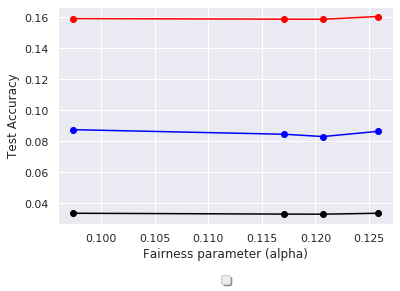

In [64]:
prec1_ours=[0.7986703625288217, 0.8026235590216136, 0.7992356117621207, 0.7931806477718437] 
rec1_ours=[0.3863145362139786, 0.38071783578457175, 0.3817323269735118, 0.3881471344115344]

prec2_yang=[0.6383379930391996, 0.6440721765068076, 0.6406039631079573, 0.6341883818792382] 
rec2_yang=[0.30009347630665956, 0.29783290518005745, 0.2973647122618978, 0.30082454572475864]

acc_ours=[0.8217,0.8228,0.8219,0.8203]
acc_yang=[ 0.788309869536375,0.7900051595783887,0.7890469521633375,0.7869]
dp=[0.1258,0.1207,0.1171,0.0974]
diff_prec=np.zeros((4,1),dtype=float)
diff_rec=np.zeros((4,1),dtype=float)
diff_acc=np.zeros((4,1),dtype=float)
for i in range(4):
    diff_prec[i]=prec1_ours[i]-prec2_yang[i]
    diff_rec[i]=rec1_ours[i]-rec2_yang[i]
    diff_acc[i]=acc_ours[i]-accu_yang[i]
dp=[0.1258,0.1207,0.1171,0.0974]
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.

 
#c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)
ax.plot(dp,diff_prec,label='',color='red',marker='o',linestyle='-') 
ax.plot(dp,diff_rec,label='',color='blue',marker='o',linestyle='-')   
ax.plot(dp,diff_acc,label='',color='black',marker='o',linestyle='-') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Test Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
#plt.show() 
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('Test Accuracy')
plt.title('')
plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('a5.png') 



No handles with labels found to put in legend.


NameError: name 'alpha' is not defined

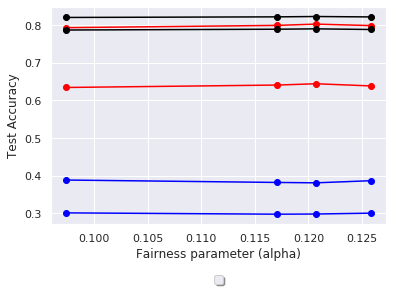

In [65]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.

 
#c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)
ax.plot(dp,prec1_ours,label='',color='red',marker='o',linestyle='-') 
ax.plot(dp,rec1_ours,label='',color='blue',marker='o',linestyle='-')   
ax.plot(dp,acc_ours,label='',color='black',marker='o',linestyle='-')
ax.plot(dp,prec2_yang,label='',color='red',marker='o',linestyle='-') 
ax.plot(dp,rec2_yang,label='',color='blue',marker='o',linestyle='-')   
ax.plot(dp,acc_yang,label='',color='black',marker='o',linestyle='-')



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Test Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
#plt.show() 
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('Test Accuracy')
plt.title('')
plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('a5.png') 

In [70]:
acc_rate=[[0.10295915871851308, 0.16058394160583941, 0.10927152317880795, 0.10742857142857143, 0.1, 0.09740259740259741, 0.10389751384214527, 0.1049127640036731, 0.10429868128104128, 0.14108910891089108, 0.10327868852459017, 0.034782608695652174, 0.06],
[0.10552702372218146, 0.16423357664233576, 0.09768211920529801, 0.10542857142857143, 0.07692307692307693, 0.0633116883116883, 0.10552600151992184, 0.0980257116620753, 0.10549751669806473, 0.13613861386138615, 0.08032786885245902, 0.043478260869565216, 0.06],
[0.10381511371973588, 0.16058394160583941, 0.10596026490066225, 0.10657142857142857, 0.08461538461538462, 0.0762987012987013, 0.10454890891325588, 0.10078053259871442, 0.10464120568590513, 0.13613861386138615, 0.09098360655737706, 0.043478260869565216, 0.06],
[0.10149180728784545, 0.14963503649635038, 0.11920529801324503, 0.11, 0.1, 0.11363636363636363, 0.10302898708066442, 0.10973370064279155, 0.10404178797739339, 0.13366336633663367, 0.11639344262295082, 0.05217391304347826, 0.06666666666666667]]

prec=[ [0.7363420427553444, 0.75, 0.696969696969697, 0.4574468085106383, 0.6923076923076923, 0.2833333333333333, 0.7335423197492164, 0.43982494529540483, 0.6502463054187192, 0.7368421052631579, 0.5, 0.5, 0.4444444444444444],
[0.7334878331402086, 0.7333333333333333, 0.7413793103448276, 0.4634146341463415, 0.7, 0.325, 0.7335390946502057, 0.45433255269320844, 0.6525974025974026, 0.7272727272727273, 0.5714285714285714, 0.6, 0.4444444444444444],
[0.7361601884570083, 0.75, 0.703125, 0.4584450402144772, 0.6363636363636364, 0.2978723404255319, 0.7341640706126688, 0.44419134396355353, 0.6513911620294599, 0.7272727272727273, 0.5315315315315315, 0.6, 0.4444444444444444],
[0.7385542168674699, 0.7560975609756098, 0.6527777777777778, 0.45194805194805193, 0.6923076923076923, 0.2571428571428571, 0.7323498419388831, 0.42887029288702927, 0.6477366255144033, 0.7407407407407407, 0.45774647887323944, 0.6666666666666666, 0.4]
          ]
rec= [[0.24323264025107885, 0.32673267326732675, 0.368, 0.4332493702770781, 0.36, 0.4594594594594595, 0.2510729613733906, 0.42948717948717946, 0.26883910386965376, 0.3333333333333333, 0.3888888888888889, 0.13333333333333333, 0.26666666666666666],
[0.24833267948214988, 0.32673267326732675, 0.344, 0.43073047858942065, 0.28, 0.35135135135135137, 0.2550071530758226, 0.41452991452991456, 0.2729124236252546, 0.31746031746031744, 0.345679012345679, 0.2, 0.26666666666666666],
[0.24519419380149077, 0.32673267326732675, 0.36, 0.43073047858942065, 0.28, 0.3783783783783784, 0.2528612303290415, 0.4166666666666667, 0.2701968771215207, 0.31746031746031744, 0.36419753086419754, 0.2, 0.26666666666666666],
[0.24048646528050216, 0.3069306930693069, 0.376, 0.43828715365239296, 0.36, 0.4864864864864865, 0.24856938483547925, 0.43803418803418803, 0.2671418873048201, 0.31746031746031744, 0.4012345679012346, 0.26666666666666666, 0.26666666666666666]
     ]   

beta_check=[0.3116898997309856, 0.3686131386861314, 0.20695364238410596, 0.11342857142857143, 0.19230769230769232, 0.060064935064935064, 0.30355010313755293, 0.10743801652892562, 0.252269224182223, 0.3118811881188119, 0.13278688524590163, 0.13043478260869565, 0.1]

weighted_precision=[]
weighted_recall=[]
for i in range(4):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    cnt1=0
    cnt2=0
    for j in range(13):
        #print(j)
              
        
        if acc_rate[i][j] <=beta_check[j]:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            cnt1=1
        else:  
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
            cnt2=1
    if cnt1==1:
        wp=weight_prec/weight_p
        weighted_precision.append(wp)
        

    if cnt2==1: 
        wr=weight_rec/weight_r
        weighted_recall.append(wr) 
        
            
   
    
    
len1=(len(weighted_precision)) 
len2=(len(weighted_recall)) 
print(len1,len2)    
print(weighted_precision, weighted_recall)

4 4
[0.8043219850799121, 0.8071067000678185, 0.8043583820110797, 0.8218880917037258] [0.7027027027027027, 0.5405405405405406, 0.5945945945945946, 0.644131878645153]


No handles with labels found to put in legend.


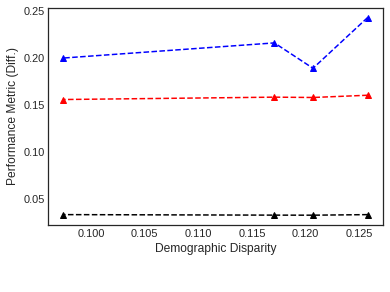

In [90]:
prec2_yang=[0.6438297778302295, 0.6490080996792885, 0.6459058887627132, 0.6659565309568289] 
rec2_yang=[0.4594594594594595, 0.35135135135135137, 0.3783783783783784, 0.44403712766544623]

prec1_our=[0.8043219850799121, 0.8071067000678185, 0.8043583820110797, 0.8218880917037258] 
rec1_our=[0.7027027027027027, 0.5405405405405406, 0.5945945945945946, 0.644131878645153]

acc_ours=[0.8217,0.8228,0.8219,0.8203]
acc_yang=[ 0.788309869536375,0.7900051595783887,0.7890469521633375,0.7869]
dp=[0.1258,0.1207,0.1171,0.0974]
diff_prec=np.zeros((4,1),dtype=float)
diff_rec=np.zeros((4,1),dtype=float)
diff_acc=np.zeros((4,1),dtype=float)
for i in range(4):
    diff_prec[i]=prec1_our[i]-prec2_yang[i]
    diff_rec[i]=rec1_our[i]-rec2_yang[i]
    diff_acc[i]=acc_ours[i]-acc_yang[i]
dp=[0.1258,0.1207,0.1171,0.0974]
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')
 
#c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)
ax.plot(dp,diff_prec,label='',color='red',marker='^',linestyle='--') 
ax.plot(dp,diff_rec,label='',color='blue',marker='^',linestyle='--')   
ax.plot(dp,diff_acc,label='',color='black',marker='^',linestyle='--') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Test Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
#plt.show() 
plt.xlabel('Demographic Disparity')
plt.ylabel('Performance Metric (Diff.)')
plt.title('')
#plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',    markerfacecolor='black', markersize=10)
plt.savefig('a5.png') 


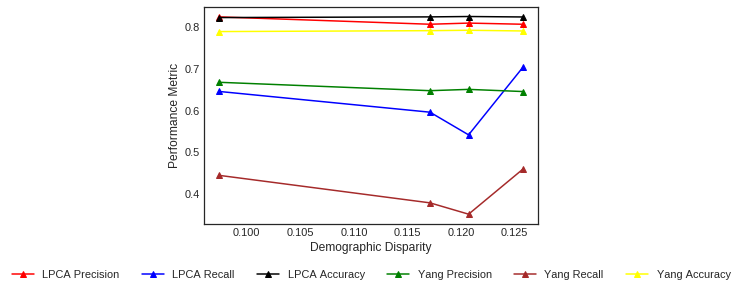

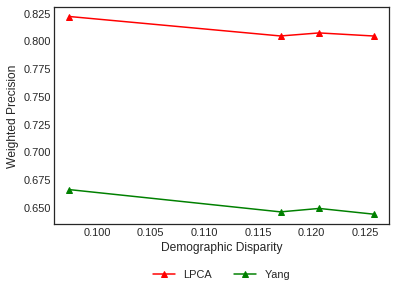

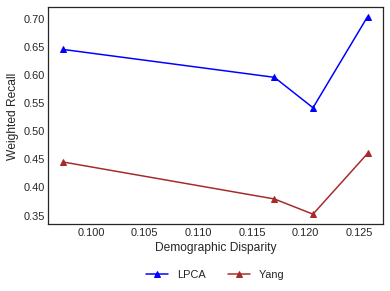

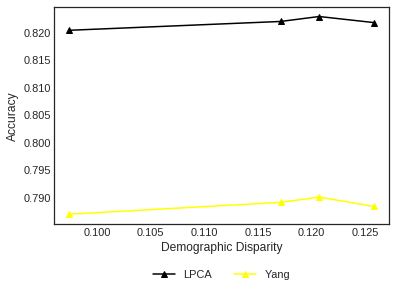

In [98]:
prec2_yang=[0.6438297778302295, 0.6490080996792885, 0.6459058887627132, 0.6659565309568289] 
rec2_yang=[0.4594594594594595, 0.35135135135135137, 0.3783783783783784, 0.44403712766544623]

prec1_our=[0.8043219850799121, 0.8071067000678185, 0.8043583820110797, 0.8218880917037258] 
rec1_our=[0.7027027027027027, 0.5405405405405406, 0.5945945945945946, 0.644131878645153]

acc_ours=[0.8217,0.8228,0.8219,0.8203]
acc_yang=[ 0.788309869536375,0.7900051595783887,0.7890469521633375,0.7869]
dp=[0.1258,0.1207,0.1171,0.0974]
diff_prec=np.zeros((4,1),dtype=float)
diff_rec=np.zeros((4,1),dtype=float)
diff_acc=np.zeros((4,1),dtype=float)
for i in range(4):
    diff_prec[i]=prec1_our[i]-prec2_yang[i]
    diff_rec[i]=rec1_our[i]-rec2_yang[i]
    diff_acc[i]=acc_ours[i]-acc_yang[i]
dp=[0.1258,0.1207,0.1171,0.0974]
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')
 
#c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')
 
#c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)
ax.plot(dp,prec1_our,color='red',label='LPCA Precision',marker='^',linestyle='-') 
ax.plot(dp,rec1_our,color='blue',label='LPCA Recall',marker='^',linestyle='-')   
ax.plot(dp,acc_ours,color='black',label='LPCA Accuracy',marker='^',linestyle='-') 
ax.plot(dp,prec2_yang,color='green',label='Yang Precision',marker='^',linestyle='-') 
ax.plot(dp,rec2_yang,color='brown',label='Yang Recall',marker='^',linestyle='-')   
ax.plot(dp,acc_yang,color='yellow',label='Yang Accuracy',marker='^',linestyle='-') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Test Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
#plt.show() 
plt.xlabel('Demographic Disparity')
plt.ylabel('Performance Metric')
plt.title('')
#plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',    markerfacecolor='black', markersize=10)
plt.savefig('a5.png')

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')
 
#c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)
ax.plot(dp,prec1_our,color='red',label='LPCA',marker='^',linestyle='-') 

ax.plot(dp,prec2_yang,color='green',label='Yang',marker='^',linestyle='-') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Test Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
#plt.show() 
plt.xlabel('Demographic Disparity')
plt.ylabel('Weighted Precision')
plt.title('')
#plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',    markerfacecolor='black', markersize=10)
plt.savefig('a5.png')

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')
 
#c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)
 
ax.plot(dp,rec1_our,color='blue',label='LPCA',marker='^',linestyle='-')   

ax.plot(dp,rec2_yang,color='brown',label='Yang',marker='^',linestyle='-')   




   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Test Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
#plt.show() 
plt.xlabel('Demographic Disparity')
plt.ylabel('Weighted Recall')
plt.title('')
#plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',    markerfacecolor='black', markersize=10)
plt.savefig('a5.png')
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')
 
#c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)
  
ax.plot(dp,acc_ours,color='black',label='LPCA',marker='^',linestyle='-') 
 
ax.plot(dp,acc_yang,color='yellow',label='Yang',marker='^',linestyle='-') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Test Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
#plt.show() 
plt.xlabel('Demographic Disparity')
plt.ylabel('Accuracy')
plt.title('')
#plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',    markerfacecolor='black', markersize=10)
plt.savefig('a5.png')

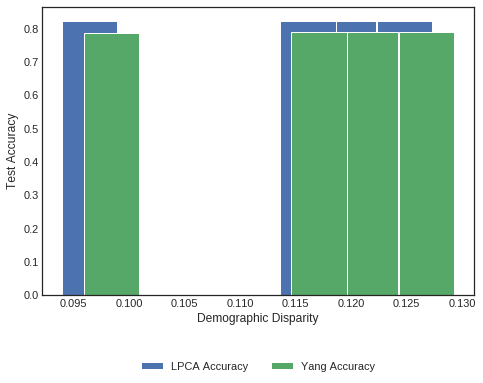

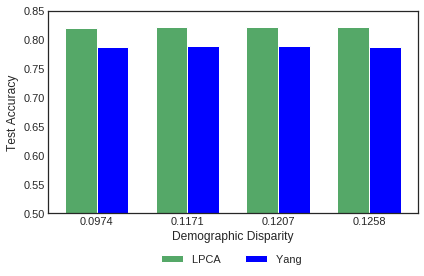

In [175]:
acc_ours=[0.8217,0.8228,0.8219,0.8203]
acc_yang=[ 0.788309869536375,0.7900051595783887,0.7890469521633375,0.7869]
dp=[0.1258,0.1207,0.1171,0.0974]
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
#plt.style.use('seaborn-white')


import numpy as np
import matplotlib.pyplot as plt
data = [
[0.8217,0.8228,0.8219,0.8203],
[ 0.788309869536375,0.7900051595783887,0.7890469521633375,0.7869]]

X = [0.1248,0.1197,0.1161,0.0964]
Y = [0.1268,0.1217,0.1171,0.0984]
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(X , data[0], color = 'b',label='LPCA Accuracy', width = 0.005)
ax.bar(Y, data[1], color = 'g',label='Yang Accuracy', width = 0.005)


   
# plt.title('')
ax.set_xlabel('Demographic Disparity')
ax.set_ylabel('Test Accuracy') 
# # ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
# #plt.show() 
# plt.xlabel('Demographic Disparity')
# plt.ylabel('Performance Metric')
# plt.title('')
# #plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',    markerfacecolor='black', markersize=10)


import matplotlib.pyplot as plt
import numpy as np


labels = ['0.0974','0.1171','0.1207','0.1258']
men_means = [0.8203,0.8219,0.8228,0.8217]
women_means = [ 0.7869,0.7890469521633375,0.7900051595783887,0.788309869536375]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, color = 'g',label='LPCA ')
rects2 = ax.bar(x + width/2, women_means, width, color = 'blue',label='Yang ')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Test Accuracy')
ax.set_xlabel('Demographic Disparity')
ax.set_title('')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()
ax.set_ylim(.5,.85 )
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
fig.tight_layout()

plt.show()
# plt.savefig('a5.png')